<a href="https://colab.research.google.com/github/Ruin9999/horse-health-prediction/blob/main/horse_health_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting Up Notebook**

In [ ]:
%%capture
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import  pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

In [ ]:
# Handling null data.
train.isnull().sum()

,0
id,0
surgery,0
age,0
hospital_number,0
rectal_temp,0
pulse,0
respiratory_rate,0
temp_of_extremities,39
peripheral_pulse,60
mucous_membrane,21


In [ ]:
# Replacing null values with most common values.

train['temp_of_extremities'] = train['temp_of_extremities'].fillna(train['temp_of_extremities'].mode()[0])
test['temp_of_extremities'] = test['temp_of_extremities'].fillna(train['temp_of_extremities'].mode()[0])

train['peripheral_pulse'] = train['peripheral_pulse'].fillna(train['peripheral_pulse'].mode()[0])
test['peripheral_pulse'] = test['peripheral_pulse'].fillna(train['peripheral_pulse'].mode()[0])

train['mucous_membrane'] = train['mucous_membrane'].fillna(train['mucous_membrane'].mode()[0])
test['mucous_membrane'] = test['mucous_membrane'].fillna(train['mucous_membrane'].mode()[0])

train['capillary_refill_time'] = train['capillary_refill_time'].fillna(train['capillary_refill_time'].mode()[0])
test['capillary_refill_time'] = test['capillary_refill_time'].fillna(train['capillary_refill_time'].mode()[0])

train['pain'] = train['pain'].fillna(train['pain'].mode()[0])
test['pain'] = test['pain'].fillna(train['pain'].mode()[0])

train['peristalsis'] = train['peristalsis'].fillna(train['peristalsis'].mode()[0])
test['peristalsis'] = test['peristalsis'].fillna(train['peristalsis'].mode()[0])

train['rectal_exam_feces'] = train['rectal_exam_feces'].fillna(train['rectal_exam_feces'].mode()[0])
test['rectal_exam_feces'] = test['rectal_exam_feces'].fillna(train['rectal_exam_feces'].mode()[0])

train['abdomen'] = train['abdomen'].fillna(train['abdomen'].mode()[0])
test['abdomen'] = test['abdomen'].fillna(train['abdomen'].mode()[0])

train['abdomo_appearance'] = train['abdomo_appearance'].fillna(train['abdomo_appearance'].mode()[0])
test['abdomo_appearance'] = test['abdomo_appearance'].fillna(train['abdomo_appearance'].mode()[0])

train['abdomen'] = train['abdomen'].replace('None', 'none')
test['abdomen'] = test['abdomen'].replace('None', 'none')
train['nasogastric_tube'] = train['nasogastric_tube'].replace('None', 'none')
test['nasogastric_tube'] = test['nasogastric_tube'].replace('None', 'none')

train = train.dropna()
test = test.dropna()

In [ ]:
# Label encoding
le = LabelEncoder()

le.fit(['no','yes']) # We do this so the label encoder will always give the same values when encoding.
train['surgery'] = le.transform(train['surgery'])
test['surgery'] = le.transform(test['surgery'])

le.fit(['adult', 'young'])
train['age'] = le.transform(train['age'])
test['age'] = le.transform(test['age'])

le.fit(['cold', 'cool', 'normal', 'warm'])
train['temp_of_extremities'] = le.transform(train['temp_of_extremities'])
test['temp_of_extremities'] = le.transform(test['temp_of_extremities'])

le.fit(['absent', 'reduced', 'normal', 'increased'])
train['peripheral_pulse'] = le.transform(train['peripheral_pulse'])
test['peripheral_pulse'] = le.transform(test['peripheral_pulse'])

le.fit(['bright_pink', 'normal_pink', 'pale_pink', 'bright_red', 'pale_cyanotic', 'dark_cyanotic'])
train['mucous_membrane'] = le.transform(train['mucous_membrane'])
test['mucous_membrane'] = le.transform(test['mucous_membrane'])

le.fit(['less_3_sec', '3', 'more_3_sec'])
train['capillary_refill_time'] = le.transform(train['capillary_refill_time'])
test['capillary_refill_time'] = le.transform(test['capillary_refill_time'])

le.fit(['alert', 'slight', 'moderate', 'mild_pain', 'severe_pain', 'extreme_pain', 'depressed'])
train['pain'] = le.transform(train['pain'])
test['pain'] = le.transform(test['pain'])

le.fit(['absent', 'hypomotile', 'normal', 'hypermotile', 'distend_small']) # distend_small only has one row with that. need to remove it.
train['peristalsis'] = le.transform(train['peristalsis'])
test['peristalsis'] = le.transform(test['peristalsis'])

le.fit(['none', 'slight', 'moderate', 'severe'])
train['abdominal_distention'] = le.transform(train['abdominal_distention'])
test['abdominal_distention'] = le.transform(test['abdominal_distention'])

le.fit(['none', 'slight', 'significant'])
train['nasogastric_tube'] = le.transform(train['nasogastric_tube'])
test['nasogastric_tube'] = le.transform(test['nasogastric_tube'])

le.fit(['none', 'slight', 'less_1_liter', 'more_1_liter'])
train['nasogastric_reflux'] = le.transform(train['nasogastric_reflux'])
test['nasogastric_reflux'] = le.transform(test['nasogastric_reflux'])

le.fit(['absent', 'decreased', 'normal', 'increased', 'serosanguious']) # serosanguious only has one row with that. need to remove it.
train['rectal_exam_feces'] = le.transform(train['rectal_exam_feces'])
test['rectal_exam_feces'] = le.transform(test['rectal_exam_feces'])

le.fit(['distend_small', 'distend_large', 'normal', 'firm', 'other']) # Should we get rid of the label 'other'?
train['abdomen'] = le.transform(train['abdomen'])
test['abdomen'] = le.transform(test['abdomen'])

le.fit(['clear', 'cloudy', 'serosanguious'])
train['abdomo_appearance'] = le.transform(train['abdomo_appearance'])
test['abdomo_appearance'] = le.transform(test['abdomo_appearance'])

le.fit(['no', 'yes'])
train['surgical_lesion'] = le.transform(train['surgical_lesion'])
test['surgical_lesion'] = le.transform(test['surgical_lesion'])

le.fit(['no', 'yes'])
train['cp_data'] = le.transform(train['cp_data'])
test['cp_data'] = le.transform(test['cp_data'])

<ipython-input-196-04a40931106d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['surgery'] = le.transform(train['surgery'])
<ipython-input-196-04a40931106d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['surgery'] = le.transform(test['surgery'])
<ipython-input-196-04a40931106d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [ ]:
# One Hot Encoding
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")
ohe_outcome = ohe.fit_transform(train[['outcome']])

In [ ]:
# Value scaling
scaler = StandardScaler()
train['rectal_temp'] = scaler.fit_transform(train[['rectal_temp']])
test['rectal_temp'] = scaler.transform(test[['rectal_temp']])

train['pulse'] = scaler.fit_transform(train[['pulse']])
test['pulse'] = scaler.transform(test[['pulse']])

train['respiratory_rate'] = scaler.fit_transform(train[['respiratory_rate']])
test['respiratory_rate'] = scaler.transform(test[['respiratory_rate']])

train['nasogastric_reflux_ph'] = scaler.fit_transform(train[['nasogastric_reflux_ph']])
test['nasogastric_reflux_ph'] = scaler.transform(test[['nasogastric_reflux_ph']])

train['packed_cell_volume'] = scaler.fit_transform(train[['packed_cell_volume']])
test['packed_cell_volume'] = scaler.transform(test[['packed_cell_volume']])

train['total_protein'] = scaler.fit_transform(train[['total_protein']])
test['total_protein'] = scaler.transform(test[['total_protein']])

train['abdomo_protein'] = scaler.fit_transform(train[['abdomo_protein']])
test['abdomo_protein'] = scaler.transform(test[['abdomo_protein']])

train['lesion_1'] = scaler.fit_transform(train[['lesion_1']])
test['lesion_1'] = scaler.transform(test[['lesion_1']])

<ipython-input-198-2ce387d61782>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['rectal_temp'] = scaler.fit_transform(train[['rectal_temp']])
<ipython-input-198-2ce387d61782>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['rectal_temp'] = scaler.transform(test[['rectal_temp']])
<ipython-input-198-2ce387d61782>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
# Dropping rows with possible row typos
# id 676 because of peristalsis distend small
# id 255 because of serosanguious rectal exam

In [ ]:
# Dropping useless columns
train_id = train['id']
test = test.drop(columns = ['id', 'hospital_number', 'lesion_2', 'lesion_3'])
train = train.drop(columns = ['id', 'hospital_number', 'lesion_2', 'lesion_3', 'outcome'])

In [ ]:
# Splitting into training data into training and validation

x_train, x_val, y_train, y_val = train_test_split(train, ohe_outcome, test_size=0.2, random_state=42)

In [ ]:
train

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,cp_data
0,1,0,-0.127032,1.811995,-0.375621,1,3,2,2,1,...,1.081361,1,1,0.716922,-0.468459,2,0.074298,1,-0.298711,0
1,1,0,-0.884521,0.303074,-1.096583,1,2,4,2,3,...,-1.263984,0,1,-1.579946,1.645456,2,-0.831634,1,-0.298890,0
2,1,0,0.125464,1.400471,-0.135300,1,3,5,1,2,...,-0.482203,0,0,-1.197135,-0.548445,2,0.074298,1,0.224322,0
3,1,0,-1.389513,-0.245624,-0.015140,0,3,5,2,3,...,-1.263984,1,1,0.334111,-0.525592,1,0.397845,1,-0.298890,1
4,0,0,-0.253280,-0.931497,1.066303,2,2,3,1,0,...,1.341954,3,3,-0.240106,-0.514165,1,-0.443378,0,-0.695067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1,0,0.377960,1.709114,1.066303,1,3,5,2,1,...,-1.263984,0,0,0.716922,1.721633,2,-0.831634,1,-0.299249,0
1231,1,0,-0.884521,-0.657148,1.186464,1,3,4,1,3,...,-0.742797,1,1,-1.388540,-0.548445,2,0.203717,1,-0.298711,1
1232,1,1,-0.884521,0.165900,0.585662,2,3,3,1,3,...,-0.742797,2,2,-0.910026,-0.567489,1,2.403839,1,-0.623296,1
1233,1,0,-0.127032,-0.314211,-0.856263,2,3,1,1,3,...,-1.263984,0,1,0.812625,2.026341,1,-0.831634,1,-0.298711,0


In [ ]:
# Saving modified data
train.to_csv('/content/drive/MyDrive/Colab Notebooks/data/cleaned_train.csv', encoding='utf-8', index=False)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(64, input_shape=(24,), activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9046 - loss: 0.2646 - val_accuracy: 0.6327 - val_loss: 1.0561
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9206 - loss: 0.2590 - val_accuracy: 0.6327 - val_loss: 1.0381
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8941 - loss: 0.2823 - val_accuracy: 0.6327 - val_loss: 1.0422
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.2733 - val_accuracy: 0.6327 - val_loss: 1.0499
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8950 - loss: 0.2568 - val_accuracy: 0.6195 - val_loss: 1.0783
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9194 - loss: 0.2557 - val_accuracy: 0.6239 - val_loss: 1.0929
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9249 - loss: 0.2515 - val_accuracy: 0.6460 - val_loss: 1.0448
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9072 - loss: 0.2674 - val_accuracy: 0.6239 - v

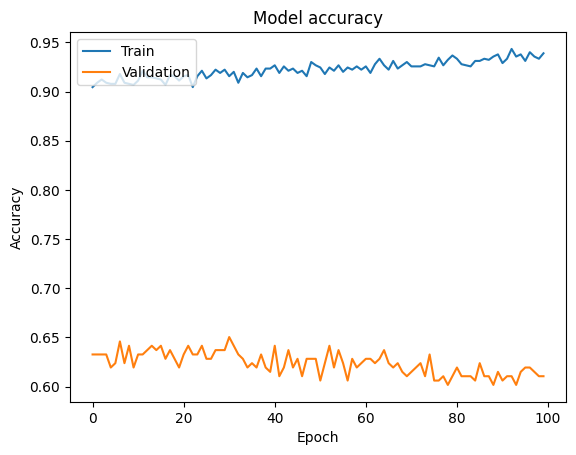

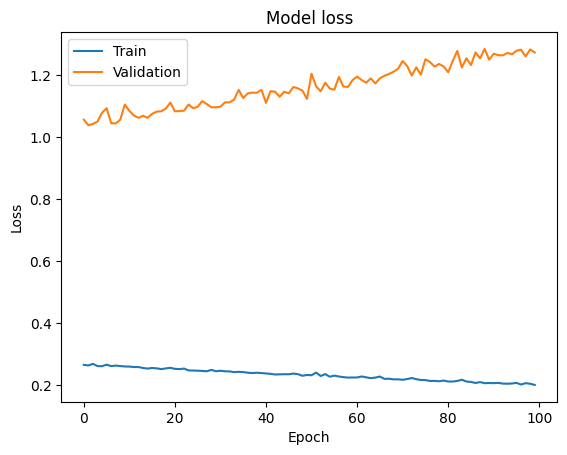

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()